In [1]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape

(60000, 28, 28)

In [4]:
from keras import models
from keras import layers

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [9]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
>>> network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2568 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1051 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0691 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0377 - accuracy: 0.9881


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 3ms/step - loss: 0.0782 - accuracy: 0.9763
test_acc: 0.9763000011444092


**Tensors**

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)

3


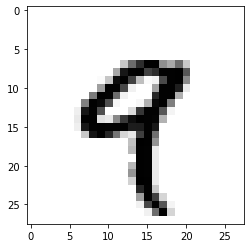

In [14]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**Classification**

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from keras import models
from keras import layers

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [19]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 10s 255ms/step - loss: 0.5238 - acc: 0.7892 - val_loss: 0.4054 - val_acc: 0.8609
Epoch 2/20
30/30 [==============================] - 3s 89ms/step - loss: 0.3175 - acc: 0.9009 - val_loss: 0.3079 - val_acc: 0.8880
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.2279 - acc: 0.9292 - val_loss: 0.3016 - val_acc: 0.8803
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1802 - acc: 0.9428 - val_loss: 0.2730 - val_acc: 0.8911
Epoch 5/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1449 - acc: 0.9535 - val_loss: 0.2969 - val_acc: 0.8807
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1144 - acc: 0.9653 - val_loss: 0.2902 - val_acc: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0953 - acc: 0.9721 - val_loss: 0.3067 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0751 -

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

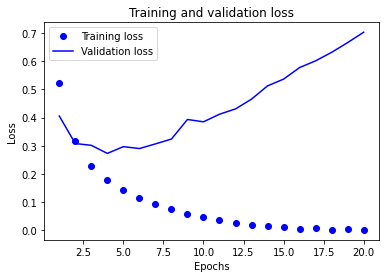

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

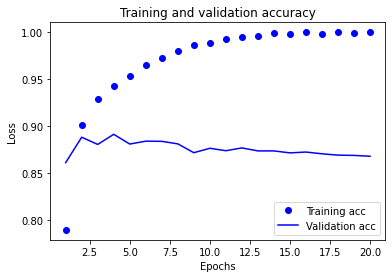

In [27]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Eliminating Overfitting**

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 6s 83ms/step - loss: 0.4611 - accuracy: 0.8215
Epoch 2/4
49/49 [==============================] - 2s 46ms/step - loss: 0.2628 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 2s 47ms/step - loss: 0.2012 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 5s 5ms/step - loss: 0.2956 - accuracy: 0.8831


In [31]:
results

[0.2956487834453583, 0.8831200003623962]

In [32]:
model.predict(x_test)

array([[0.23023942],
       [0.99955076],
       [0.87295645],
       ...,
       [0.16311786],
       [0.08479932],
       [0.66160727]], dtype=float32)

In [33]:
from keras.datasets import reuters

In [34]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [35]:
len(train_data)

8982

In [36]:
len(test_data)

2246

In [38]:
train_data[10][1:10]

[245, 273, 207, 156, 53, 74, 160, 26, 14]

In [40]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 2s 3us/step


In [41]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [42]:
train_labels[10]

3

In [43]:
import numpy as np

In [44]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [45]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [46]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [47]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [48]:
from keras.utils.np_utils import to_categorical

In [49]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [50]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [51]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [53]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 7s 167ms/step - loss: 2.4931 - accuracy: 0.5268 - val_loss: 1.6762 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.3839 - accuracy: 0.7082 - val_loss: 1.2812 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0402 - accuracy: 0.7769 - val_loss: 1.1459 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 57ms/step - loss: 0.8248 - accuracy: 0.8254 - val_loss: 1.0275 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 1s 80ms/step - loss: 0.6639 - accuracy: 0.8582 - val_loss: 0.9727 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.5338 - accuracy: 0.8915 - val_loss: 0.9369 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 54ms/step - loss: 0.4294 - accuracy: 0.9113 - val_loss: 0.9081 - val_accuracy: 0.8140
Epoch 8/20
1

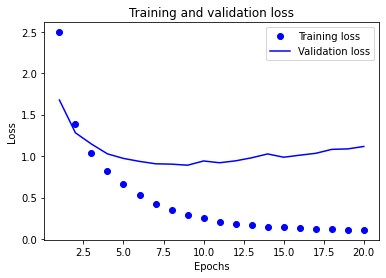

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

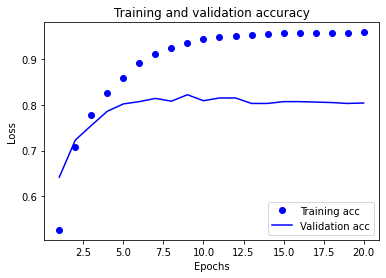

In [60]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [61]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [62]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 89ms/step - loss: 2.7584 - accuracy: 0.4828 - val_loss: 1.8309 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 1s 45ms/step - loss: 1.4445 - accuracy: 0.7027 - val_loss: 1.3410 - val_accuracy: 0.7010
Epoch 3/9
16/16 [==============================] - 1s 61ms/step - loss: 1.0543 - accuracy: 0.7706 - val_loss: 1.1481 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 2s 143ms/step - loss: 0.8256 - accuracy: 0.8193 - val_loss: 1.0318 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 2s 149ms/step - loss: 0.6556 - accuracy: 0.8633 - val_loss: 0.9684 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 2s 122ms/step - loss: 0.5209 - accuracy: 0.8926 - val_loss: 0.9388 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 1s 93ms/step - loss: 0.4192 - accuracy: 0.9157 - val_loss: 0.9059 - val_accuracy: 0.8180
Epoch 8/9
16/16 [

In [64]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 1s 15ms/step - loss: 0.9512 - accuracy: 0.7903 0s - loss: 0.8611 


In [65]:
results

[0.9512128829956055, 0.7902938723564148]

In [66]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19011576135351738

In [68]:
predictions = model.predict(x_test)

In [69]:
predictions[0].shape

(46,)

In [74]:
np.sum(predictions[2])

1.0000001

In [71]:
np.argmax(predictions[0])

3

In [76]:
predictions[0][4]

0.24259582

**Regression**

In [77]:
from keras.datasets import boston_housing

In [79]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [80]:
train_data.shape

(404, 13)

In [81]:
test_data.shape

(102, 13)

In [83]:
train_targets[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

**Normalizing Data**

In [84]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [85]:
test_data -= mean
test_data /= std

In [86]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
              input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

**K-fold validation**

In [88]:
k=4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

In [89]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

partial_train_data = np.concatenate( 
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]], axis=0)

partial_train_targets = np.concatenate( 
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]], axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [91]:
model = build_model()

model.fit(partial_train_data, partial_train_targets,
          epochs=num_epochs, batch_size=1, verbose=0)

val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

In [92]:
all_scores

[2.8618640899658203]